In [3]:
import numpy as np
import pandas as pan
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
heartData=pan.read_csv('/content/hd.csv')
heartData.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
print(heartData.shape)
heartData.dtypes

(303, 14)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
print(heartData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


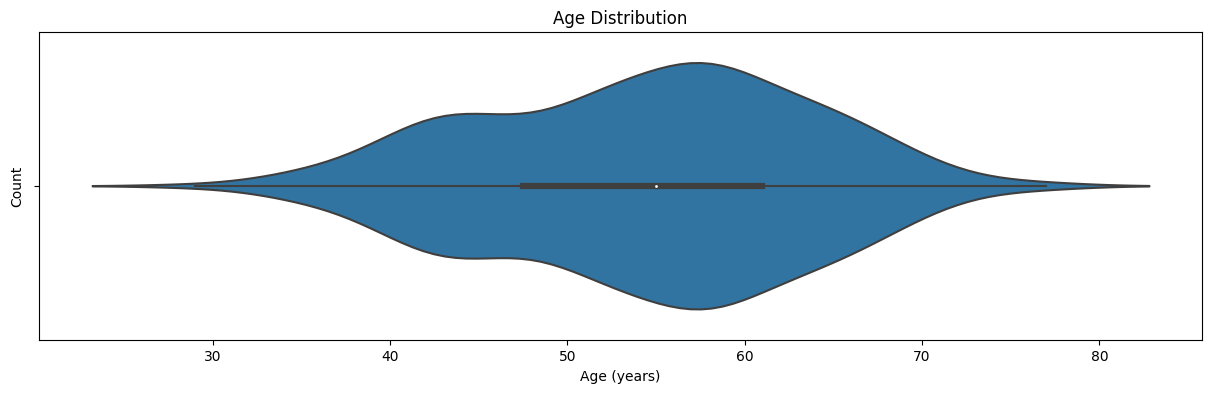

In [7]:
plt.figure(figsize=(15,4))
sns.violinplot(x=heartData['age'])
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

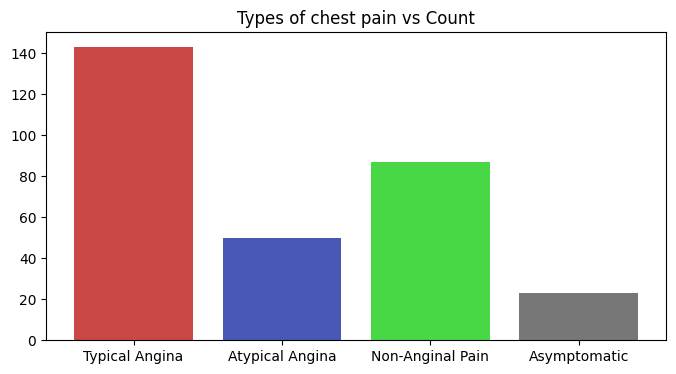

In [12]:
pain = heartData['cp'].value_counts()
pain_dict={"Typical Angina": pain[0], "Atypical Angina": pain[1],"Non-Anginal Pain": pain[2],"Asymptomatic": pain[3]}
names=list(pain_dict.keys())
values=list(pain_dict.values())

plt.figure(figsize=(8,4))
plt.bar(range(len(pain_dict)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Types of chest pain vs Count')
plt.show()

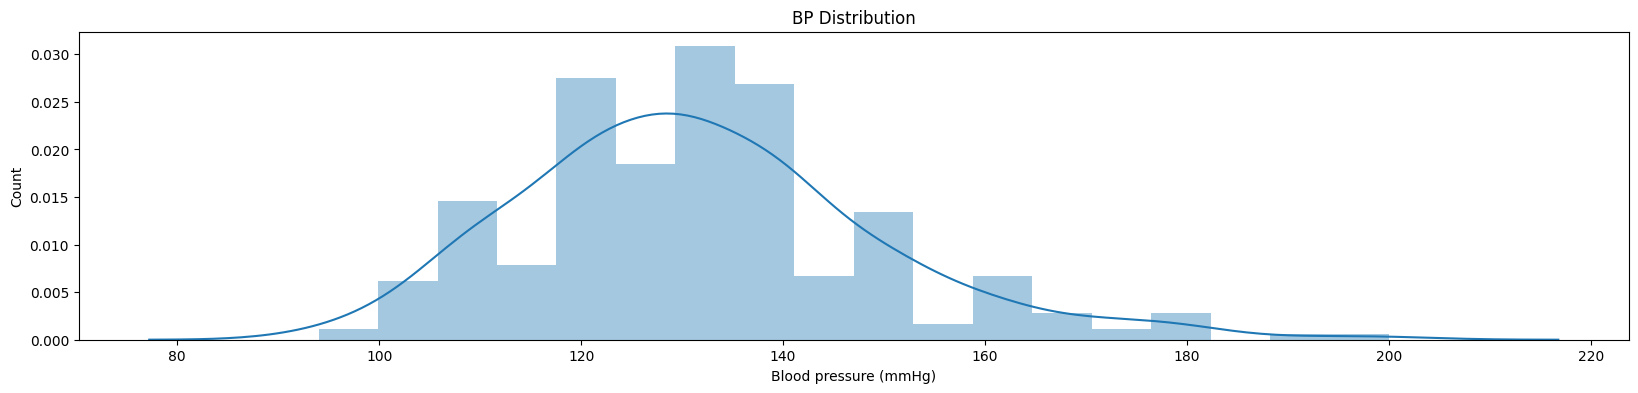

In [9]:
plt.figure(figsize=(20,4))
sns.distplot(x=heartData['trestbps'])
plt.xlabel('Blood pressure (mmHg)')
plt.ylabel('Count')
plt.title('BP Distribution')
plt.show()

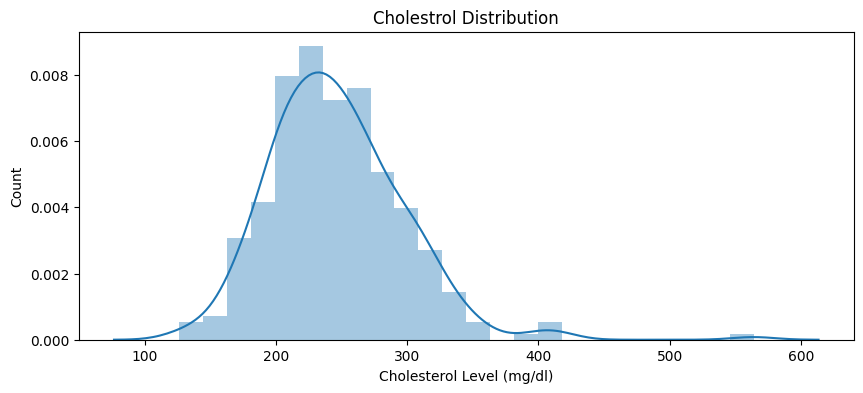

In [10]:
plt.figure(figsize=(10,4))
sns.distplot(x=heartData['chol'])
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Count')
plt.title("Cholestrol Distribution")
plt.show()

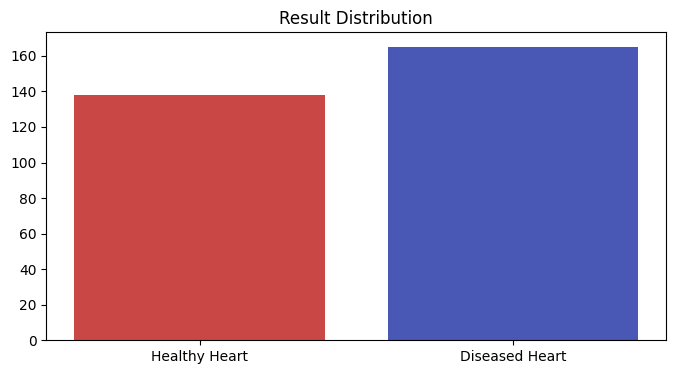

In [13]:
result = heartData['target'].value_counts()
result_dict={"Healthy Heart": result[0], "Diseased Heart": result[1]}
names=list(result_dict.keys())
values=list(result_dict.values())

plt.figure(figsize=(8,4))
plt.bar(range(len(result_dict)), values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Result Distribution')
plt.show()

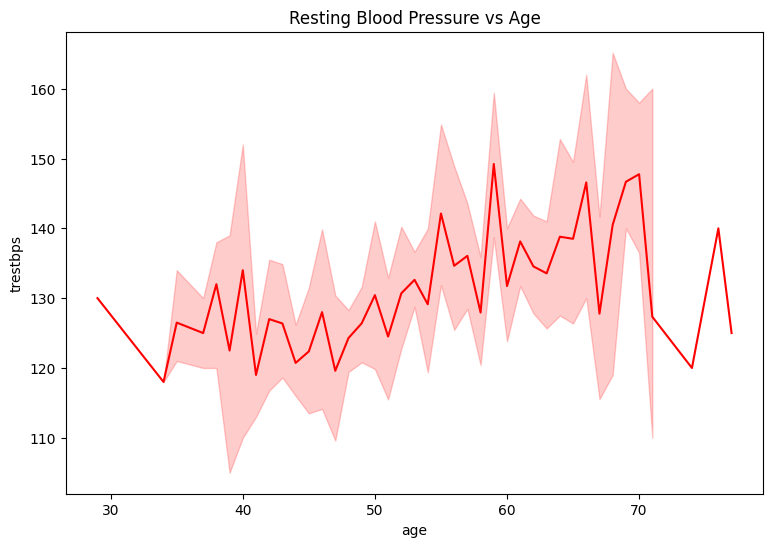

In [16]:
# Age vs Blood Pressure at rest
plt.figure(figsize=(9,6))
sns.lineplot(x="age", y="trestbps", data=heartData, color="red")
plt.title("Resting Blood Pressure vs Age")
plt.show()

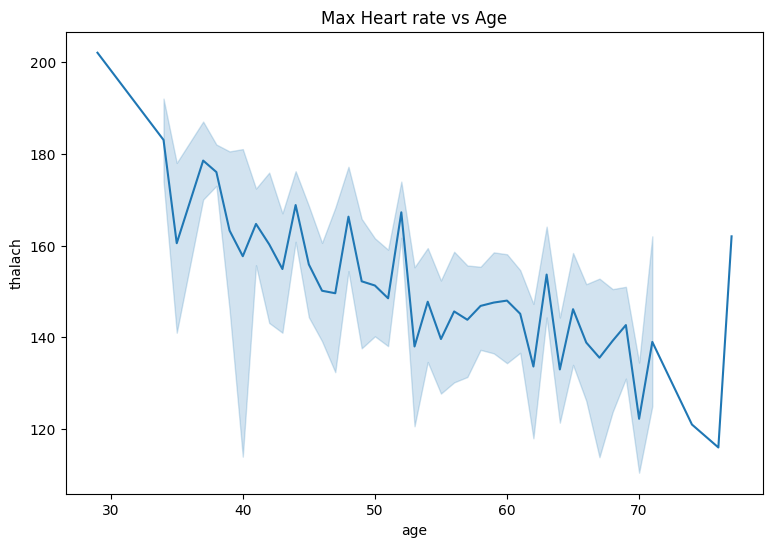

In [13]:
# Age vs Max heart rate
plt.figure(figsize=(9,6))
sns.lineplot(x="age", y="thalach", data=heartData)
plt.title("Max Heart rate vs Age")
plt.show()

In [14]:
heartData.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
X=heartData.drop(columns='target',axis=1)
Y=heartData['target']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=4)

In [16]:
print(x_test.to_markdown())

|     |   age |   sex |   cp |   trestbps |   chol |   fbs |   restecg |   thalach |   exang |   oldpeak |   slope |   ca |   thal |
|----:|------:|------:|-----:|-----------:|-------:|------:|----------:|----------:|--------:|----------:|--------:|-----:|-------:|
| 292 |    58 |     0 |    0 |        170 |    225 |     1 |         0 |       146 |       1 |       2.8 |       1 |    2 |      1 |
|  38 |    65 |     0 |    2 |        155 |    269 |     0 |         1 |       148 |       0 |       0.8 |       2 |    0 |      2 |
|  26 |    59 |     1 |    2 |        150 |    212 |     1 |         1 |       157 |       0 |       1.6 |       2 |    0 |      2 |
| 286 |    59 |     1 |    3 |        134 |    204 |     0 |         1 |       162 |       0 |       0.8 |       2 |    2 |      2 |
| 267 |    49 |     1 |    2 |        118 |    149 |     0 |         0 |       126 |       0 |       0.8 |       2 |    3 |      2 |
| 217 |    63 |     1 |    0 |        130 |    330 |     1 |         

In [17]:
print(y_test.to_markdown())

|     |   target |
|----:|---------:|
| 292 |        0 |
|  38 |        1 |
|  26 |        1 |
| 286 |        0 |
| 267 |        0 |
| 217 |        0 |
| 121 |        1 |
| 268 |        0 |
|  40 |        1 |
|   3 |        1 |
| 252 |        0 |
|  25 |        1 |
| 287 |        0 |
|   5 |        1 |
|  81 |        1 |
|  32 |        1 |
| 294 |        0 |
|  36 |        1 |
| 152 |        1 |
|  74 |        1 |
| 221 |        0 |
| 215 |        0 |
| 222 |        0 |
|  35 |        1 |
|   4 |        1 |
|   2 |        1 |
|  49 |        1 |
| 209 |        0 |
|  57 |        1 |
|  77 |        1 |
| 238 |        0 |
| 300 |        0 |
|  79 |        1 |
| 201 |        0 |
| 220 |        0 |
| 147 |        1 |
| 269 |        0 |
| 298 |        0 |
| 144 |        1 |
| 153 |        1 |
| 165 |        0 |
| 259 |        0 |
| 223 |        0 |
|  22 |        1 |
| 203 |        0 |
|  29 |        1 |
|  28 |        1 |
| 108 |        1 |
| 135 |        1 |
|  37 |        1 |
| 127 |     

In [134]:
accuracy={}
recall={}
f_score={}

USING LOGISTIC REGRESSION

In [135]:
from sklearn.linear_model import LogisticRegression
logic=LogisticRegression()
logic.fit(x_train, y_train)
x_train_logic = logic.predict(x_train)
x_test_logic = logic.predict(x_test)

training_acc_logic = accuracy_score(x_train_logic, y_train)
testing_acc_logic = accuracy_score(x_test_logic, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_logic*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_logic*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_logic)

precision_logic=precision_score(y_test,x_test_logic)
print("\nPrecision is %.2f"%(precision_logic*100))



print("\nConfusion Matrix: ")
cm_logic=confusion_matrix(y_test,x_test_logic)
print(cm_logic)
tp_l=cm_logic[1,1]
fp_l=cm_logic[0,1]
fn_l=cm_logic[1,0]
tn_l=cm_logic[0,0]

r_l=(tp_l/(tp_l+fn_l))
print("Recall: %.3f"%r_l)

f_l=(2*precision_logic*r_l)/(precision_logic+r_l)
print("F Score: %.3f"%f_l)

accuracy["Logistic"]=training_acc_logic
recall["Logistic"]=r_l
f_score["Logistic"]=f_l

Accuracy on Training Data: 82.64
Accuracy on Testing Data: 88.52

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0]

Precision is 84.21

Confusion Matrix: 
[[22  6]
 [ 1 32]]
Recall: 0.970
F Score: 0.901


USING RANDOM FOREST

In [138]:
from sklearn.ensemble import RandomForestClassifier
randomForest=RandomForestClassifier(random_state=3, max_features=0.1, min_samples_leaf=5, min_samples_split=8,n_estimators=40)
randomForest.fit(x_train,y_train)
x_train_rf=randomForest.predict(x_train)
x_test_rf=randomForest.predict(x_test)

training_acc_rf = accuracy_score(x_train_rf, y_train)
testing_acc_rf = accuracy_score(x_test_rf, y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_rf*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_rf*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_rf)

precision_rf=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_rf*100))

print("\nConfusion Matrix: ")
cm_rf=confusion_matrix(y_test,x_test_rf)
print(cm_rf)
tp_rf=cm_rf[1,1]
fp_rf=cm_rf[0,1]
fn_rf=cm_rf[1,0]
tn_rf=cm_rf[0,0]

r_rf=(tp_rf/(tp_rf+fn_rf))
print("Recall: %.3f"%r_rf)

f_rf=(2*precision_rf*r_rf)/(precision_rf+r_rf)
print("F Score: %.3f"%f_rf)

accuracy["RandomForest"]=training_acc_rf
recall["RandomForest"]=r_rf
f_score["RandomForest"]=f_rf

Accuracy on Training Data: 88.43
Accuracy on Testing Data: 88.52

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0
 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0]

Precision is 86.11

Confusion Matrix: 
[[23  5]
 [ 2 31]]
Recall: 0.939
F Score: 0.899


USING KNN ALGORITHM

In [140]:
from sklearn.neighbors import KNeighborsClassifier
k_nearest=KNeighborsClassifier()
k_nearest.fit(x_train, y_train)
x_train_knn=k_nearest.predict(x_train)
x_test_knn=k_nearest.predict(x_test)

training_acc_knn=accuracy_score(x_train_knn,y_train)
testing_acc_knn=accuracy_score(x_test_knn,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_knn*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_knn*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_knn)

precision_knn=precision_score(y_test,x_test_rf)
print("\nPrecision is %.2f"%(precision_knn*100))

print("\nConfusion Matrix: ")
cm_knn=confusion_matrix(y_test,x_test_knn)
print(cm_knn)
tp_knn=cm_knn[1,1]
fp_knn=cm_knn[0,1]
fn_knn=cm_knn[1,0]
tn_knn=cm_knn[0,0]

r_k=(tp_knn/(tp_knn+fn_knn))
print("Recall: %.3f"%r_k)

f_k=(2*precision_knn*r_k)/(precision_knn+r_k)
print("F Score: %.3f"%f_k)

accuracy["KNN"]=training_acc_knn
recall["KNN"]=r_k
f_score["KNN"]=f_k

Accuracy on Training Data: 78.10
Accuracy on Testing Data: 63.93

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0]

Precision is 86.11

Confusion Matrix: 
[[19  9]
 [13 20]]
Recall: 0.606
F Score: 0.711


USING SUPPORT VECTOR MACHINES

In [142]:
from sklearn.svm import SVC
support_vector=SVC()
support_vector.fit(x_train, y_train)
x_train_svm=support_vector.predict(x_train)
x_test_svm=support_vector.predict(x_test)

training_acc_svm=accuracy_score(x_train_svm,y_train)
testing_acc_svm=accuracy_score(x_test_svm,y_test)
print("Accuracy on Training Data: %.2f"%(training_acc_svm*100))
print("Accuracy on Testing Data: %.2f"%(testing_acc_svm*100))
print('\nTrue:', y_test.values)
print('Pred:', x_test_svm)

precision_svm=precision_score(y_test,x_test_svm)
print("\nPrecision is %.2f"%(precision_svm*100))

print("\nConfusion Matrix: ")
cm_svm=confusion_matrix(y_test,x_test_svm)
print(cm_svm)
tp_svm=cm_svm[1,1]
fp_svm=cm_svm[0,1]
fn_svm=cm_svm[1,0]
tn_svm=cm_svm[0,0]

r_s=(tp_l/(tp_l+fn_l))
print("Recall: %.3f"%r_s)

f_s=(2*precision_svm*r_s)/(precision_svm+r_s)
print("F Score: %.3f"%f_s)

accuracy["SVM"]=training_acc_svm
recall["SVM"]=r_s
f_score["SVM"]=f_s

Accuracy on Training Data: 66.12
Accuracy on Testing Data: 70.49

True: [0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0
 0 1 1 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0]
Pred: [0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1]

Precision is 66.67

Confusion Matrix: 
[[13 15]
 [ 3 30]]
Recall: 0.970
F Score: 0.790


PERFORMANCE COMPARISON


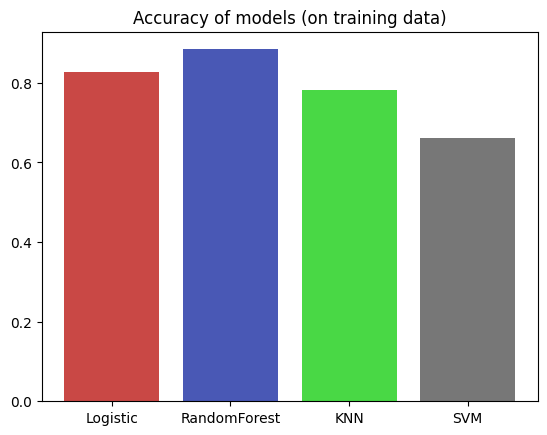

In [156]:
x=(range(len(accuracy)))
names=list(accuracy.keys())
values=list(accuracy.values())

plt.bar(x, values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Accuracy of models (on training data)')
plt.show()

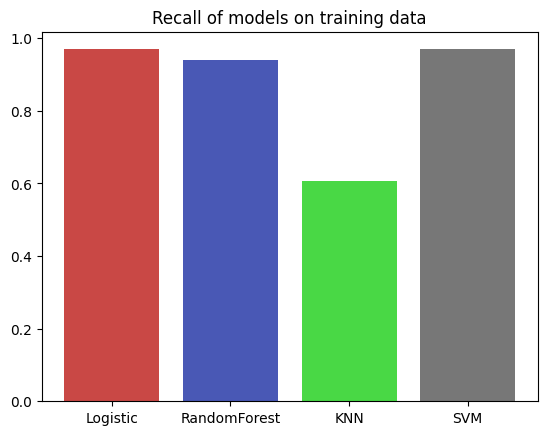

In [147]:
y=(range(len(recall)))
names=list(recall.keys())
values=list(recall.values())

plt.bar(y, values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('Recall of models on training data')
plt.show()

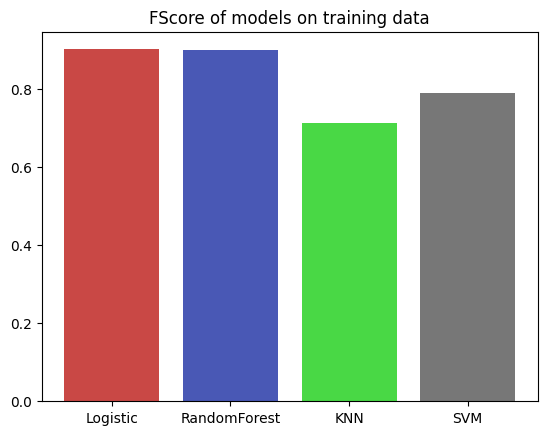

In [148]:
z=(range(len(f_score)))
names=list(f_score.keys())
values=list(f_score.values())

plt.bar(z, values, tick_label=names, color=['#C94845', '#4958B5', '#49D845', '#777777'])
plt.title('FScore of models on training data')
plt.show()

In [ ]:
input_data=input("Enter the reading values : ")
inTuple=tuple(map(float, input_data.split(',')))
input_data_as_numpy_array = np.asarray(inTuple)
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = randomForest.predict(input_data_reshape)

print("\n----------------------------------------------------------")
print("For the given readings: %s"%input_data)
print("----------------------------------------------------------")
print("==========================================================")
if(prediction[0]==0):
  print("The Patient has a HEALTHY HEART.")
else:
  print("The Patient's heart is PRONE TO A DISEASE!!!")
print("==========================================================")

Enter the reading values : 74,0,1,120,269,0,0,121,1,0.2,2,1,2

----------------------------------------------------------
For the given readings: 74,0,1,120,269,0,0,121,1,0.2,2,1,2
----------------------------------------------------------
The Patient's heart is PRONE TO A DISEASE!!!
